/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [ ]:
df = pd.read_csv("datasets/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first = True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
X_train.shape

(8000, 11)

In [17]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_trf= scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [19]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

2025-05-14 13:33:59.393339: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747229639.424952    9654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747229639.434115    9654 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 13:34:03.378047: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [24]:
history = model.fit(X_train_trf, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7015 - loss: 0.6089 - val_accuracy: 0.8087 - val_loss: 0.4814
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4676 - val_accuracy: 0.8138 - val_loss: 0.4471
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8111 - loss: 0.4374 - val_accuracy: 0.8163 - val_loss: 0.4359
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4363 - val_accuracy: 0.8175 - val_loss: 0.4305
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4242 - val_accuracy: 0.8206 - val_loss: 0.4259
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8308 - loss: 0.4037 - val_accuracy: 0.8238 - val_loss: 0.4209
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.4162 - val_accuracy: 0.8263 - val_loss: 0.4157
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8222 - loss: 0.4071 - val_accu

In [25]:
model.layers[0].get_weights()

[array([[-0.09373214,  0.04354118, -0.3569081 , -0.06909718,  0.16966182,
         -0.09820024,  0.0956625 , -0.32781985, -0.16729346,  0.17767344,
         -0.12218047],
        [ 0.11865788,  0.1101957 ,  1.3604313 , -0.9175271 , -0.8035337 ,
          0.13516182,  0.6224419 , -0.4649575 ,  0.2535172 , -0.06320901,
          0.68868726],
        [ 0.20512582,  0.26388267, -0.49956408,  0.30837563, -0.23405717,
         -0.2031124 ,  0.00753544, -0.4205382 , -0.46313852,  0.05915432,
          0.47421533],
        [-0.10250035,  0.04789265, -0.21183148,  0.18455745, -0.7253424 ,
         -0.55478126, -0.13354641,  0.4098009 ,  0.66182065, -0.69505936,
         -0.6147184 ],
        [-1.1848996 ,  1.4422042 ,  0.73721725,  0.06066629,  0.3945024 ,
         -0.66162413, -0.09634732,  0.11187635,  0.16333628, -0.19600765,
          0.05972156],
        [-0.13924155, -0.06462193, -0.3050661 ,  0.02915048, -0.14514479,
          0.05336662, -0.05051279, -0.19410014,  0.08658675, -0.0439274

In [26]:
model.layers[1].get_weights()

[array([[ 4.16773826e-01, -3.09222668e-01,  4.59281057e-01,
          6.81633115e-01, -2.86244929e-01, -3.90124917e-01,
          6.07479538e-04, -3.44104320e-01, -4.39941943e-01,
         -1.51374087e-01, -2.67665267e-01],
        [ 3.70683849e-01,  1.18396401e+00,  7.25013614e-02,
         -5.01245707e-02, -3.03324312e-01,  1.61461711e-01,
          2.98499495e-01,  3.01907994e-02, -9.51298513e-03,
         -4.32748824e-01, -2.90642202e-01],
        [-7.57125199e-01,  4.34874684e-01,  1.37827128e-01,
          3.42935562e-01,  4.74184379e-02,  7.33320296e-01,
         -4.94645745e-01, -2.69426912e-01,  6.71621084e-01,
          3.48704308e-01, -4.43693697e-02],
        [ 2.10317776e-01, -2.15165913e-01,  7.58657992e-01,
         -4.71892476e-01,  1.25405312e-01,  5.12654722e-01,
         -4.15831022e-02, -1.69010580e-01,  5.03037989e-01,
          5.20008504e-01,  3.48849110e-02],
        [-3.48929703e-01, -1.04508869e-01,  4.42040443e-01,
         -3.01121205e-01,  5.46046138e-01,  

In [27]:
model.layers[2].get_weights()

[array([[-0.6475319 ],
        [ 1.6188387 ],
        [ 0.8139718 ],
        [ 0.9937013 ],
        [-0.62717956],
        [-0.6416621 ],
        [-0.62446576],
        [-0.99099797],
        [-0.30564573],
        [-0.87402403],
        [-0.42721394]], dtype=float32),
 array([-0.0306855], dtype=float32)]

In [28]:
y_log =  model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
y_log

array([[0.27608696],
       [0.24587522],
       [0.12522857],
       ...,
       [0.24970761],
       [0.23958977],
       [0.22688624]], dtype=float32)

In [30]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [31]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

In [33]:
import matplotlib.pyplot as plt


In [34]:
history

In [38]:
# history.history

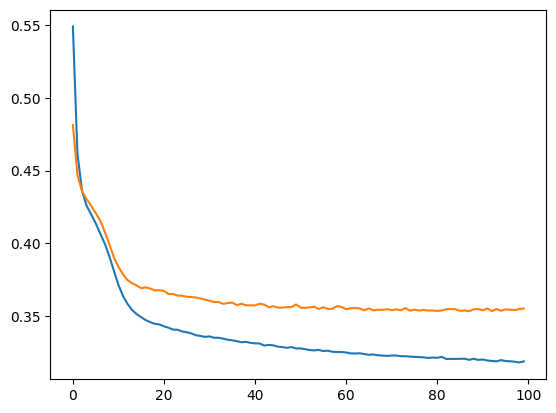

In [41]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

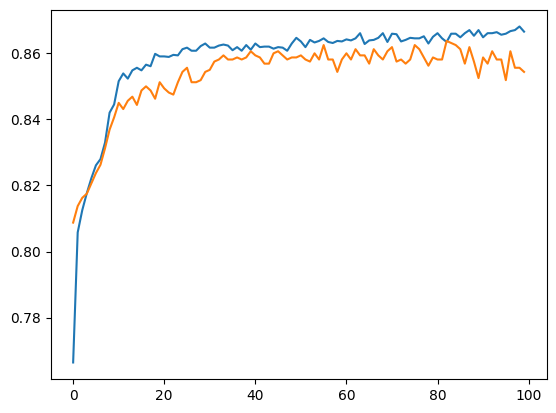

In [42]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);